### Final grade
___

Using exercises spreadsheets from Designing and Analyzing Language Tests by Oxford. The purpose of this notebook is to create a gradebook - that is, a record of every student's grade n every quiz, test, or assignment in the course, and their end-of-course grade.

<br>

#### General Setup
___

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# styling for plots
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (7,5)

<br>

#### Load the data
___

In [3]:
# load the data set and check the first 5 rows
test_res = pd.read_excel('Data/overall_results.xlsx')
test_res.head()

,Name,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final
0,Student 1,70,76,91,66,36.0,92,64.0,100.0,46.0,87.0,74
1,Student 2,100,80,80,64,NaN,100,60.0,48.0,NaN,84.0,70
2,Student 3,82,84,94,70,100.0,100,100.0,96.0,54.0,90.0,75
3,Student 4,79,84,92,70,44.0,92,100.0,100.0,61.0,96.0,84
4,Student 5,76,76,79,36,NaN,52,NaN,32.0,21.0,86.0,56


In [4]:
test_res.tail()

,Name,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final
27,Student 28,94,92,88,90,36.0,100,96.0,100.0,96.0,98.0,100
28,Student 29,91,84,82,53,32.0,100,100.0,80.0,71.0,86.0,56
29,Student 30,85,64,62,33,NaN,84,72.0,48.0,NaN,89.0,33
30,Student 31,85,80,80,57,8.0,72,72.0,100.0,54.0,91.0,66
31,Student 32,43,96,80,56,16.0,88,100.0,92.0,54.0,92.0,76


In [5]:
# data set info
test_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     32 non-null     object 
 1   Quiz #1  32 non-null     int64  
 2   Quiz #2  32 non-null     int64  
 3   Quiz #3  32 non-null     int64  
 4   Midterm  32 non-null     int64  
 5   Quiz #4  25 non-null     float64
 6   Quiz #5  32 non-null     int64  
 7   Quiz #6  30 non-null     float64
 8   Quiz #7  30 non-null     float64
 9   Quiz #8  28 non-null     float64
 10  Project  32 non-null     float64
 11  Final    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


The dataset shows test results for 32 students. There are 8 quizzes, 1 midterm, 1 project and 1 final test. The dataset also has some missing values. We will ignore it and leave them blank since changing them to 0.0 may reduce the overall grade.

In [6]:
# check stats
test_res.describe()

,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final
count,32.000000,32.00000,32.000000,32.000000,25.00000,32.000000,30.000000,30.000000,28.000000,32.000000,32.000000
mean,85.562500,84.75000,85.031250,64.437500,49.12000,87.375000,84.533333,86.000000,65.642857,88.548387,74.593750
std,18.007055,8.70669,12.364059,15.514691,28.74068,15.175851,21.340803,23.786406,24.840550,7.897892,16.498014
min,28.000000,64.00000,50.000000,33.000000,8.00000,48.000000,32.000000,28.000000,14.000000,57.000000,33.000000
25%,82.000000,79.00000,80.750000,56.750000,32.00000,84.000000,73.000000,83.000000,53.000000,86.750000,66.750000
50%,89.500000,84.00000,88.000000,65.000000,48.00000,92.000000,96.000000,100.000000,66.000000,90.000000,75.500000
75%,100.000000,92.00000,92.000000,70.250000,64.00000,100.000000,100.000000,100.000000,83.750000,93.000000,84.000000
max,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000


<br>

#### EDA
___

The course grades are based on the average quiz grade (30%), the course project (30%), the midterm exam (20%), and the final exam (20%).

In [7]:
# calculate the mean for quizes for each student
test_res['Quiz Avg'] = np.round(test_res.drop(['Name', 'Midterm', 'Project', 'Final'], axis=1).mean(axis=1), 2)
test_res.head()

,Name,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final,Quiz Avg
0,Student 1,70,76,91,66,36.0,92,64.0,100.0,46.0,87.0,74,71.88
1,Student 2,100,80,80,64,NaN,100,60.0,48.0,NaN,84.0,70,78.00
2,Student 3,82,84,94,70,100.0,100,100.0,96.0,54.0,90.0,75,88.75
3,Student 4,79,84,92,70,44.0,92,100.0,100.0,61.0,96.0,84,81.50
4,Student 5,76,76,79,36,NaN,52,NaN,32.0,21.0,86.0,56,56.00


In [8]:
# calculate weighted average
test_res['Wtd. Avg'] = np.round(test_res['Quiz Avg'] * 0.3 + test_res['Midterm'] * 0.2 + test_res['Project'] * 0.3 + test_res['Final'] * 0.2, 2)
test_res.head()

,Name,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final,Quiz Avg,Wtd. Avg
0,Student 1,70,76,91,66,36.0,92,64.0,100.0,46.0,87.0,74,71.88,75.66
1,Student 2,100,80,80,64,NaN,100,60.0,48.0,NaN,84.0,70,78.00,75.40
2,Student 3,82,84,94,70,100.0,100,100.0,96.0,54.0,90.0,75,88.75,82.62
3,Student 4,79,84,92,70,44.0,92,100.0,100.0,61.0,96.0,84,81.50,84.05
4,Student 5,76,76,79,36,NaN,52,NaN,32.0,21.0,86.0,56,56.00,61.00


In [9]:
# calculate mean for each column
averages = pd.DataFrame({'Average': np.round(test_res.loc[:, test_res.columns != 'Name'].mean(), 2)}).T
averages

,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final,Quiz Avg,Wtd. Avg
Average,85.56,84.75,85.03,64.44,49.12,87.38,84.53,86.0,65.64,88.55,74.59,78.87,78.03


We can now see that the class average for the aveall course (the average of the weighted averages) is around 78.0. 
We can curve the grades - in that if the class average is below 85%, points will be added to every the student's final score in order to raise the average to this target.

In [10]:
# calculate the curve
curve = 85 - averages.values[:,-1][0]
np.around(curve)

7.0

The result is the number of points added to each student's course grade.

In [11]:
# calculate the curved avg. only apply if curve is above 0
if curve > 0:
    test_res['Curved Avg'] = test_res['Wtd. Avg'] + curve
    test_res.head(6)
else:
    test_res['Curved Avg'] = test_res['Wtd. Avg']

In [12]:
# calculate the rounded avg
test_res['Rounded Avg'] = np.around(test_res['Curved Avg']).astype(int)
test_res.head()

,Name,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final,Quiz Avg,Wtd. Avg,Curved Avg,Rounded Avg
0,Student 1,70,76,91,66,36.0,92,64.0,100.0,46.0,87.0,74,71.88,75.66,82.63,83
1,Student 2,100,80,80,64,NaN,100,60.0,48.0,NaN,84.0,70,78.00,75.40,82.37,82
2,Student 3,82,84,94,70,100.0,100,100.0,96.0,54.0,90.0,75,88.75,82.62,89.59,90
3,Student 4,79,84,92,70,44.0,92,100.0,100.0,61.0,96.0,84,81.50,84.05,91.02,91
4,Student 5,76,76,79,36,NaN,52,NaN,32.0,21.0,86.0,56,56.00,61.00,67.97,68


<br>

#### Grade lookup
___

In [13]:
# load grade dataset
grades = pd.read_excel('Data/grades.xlsx')
grades

,Min,Max,Grade
0,0,59,F
1,60,62,D-
2,63,66,D
3,67,69,D+
4,70,72,C-
5,73,76,C
6,77,79,C+
7,80,82,B-
8,83,86,B
9,87,89,B+


In [14]:
# create a list of ranges from the min and max columns
val = grades.loc[:,'Min':'Max'].apply(tuple, 1).tolist()
val

[(0, 59),
 (60, 62),
 (63, 66),
 (67, 69),
 (70, 72),
 (73, 76),
 (77, 79),
 (80, 82),
 (83, 86),
 (87, 89),
 (90, 92),
 (93, 96),
 (97, 106)]

In [15]:
# turn into an interval
indx = pd.IntervalIndex.from_tuples(val, closed='both')
indx

IntervalIndex([[0, 59], [60, 62], [63, 66], [67, 69], [70, 72] ... [83, 86], [87, 89], [90, 92], [93, 96], [97, 106]], dtype='interval[int64, both]')

In [16]:
# add a column to the test res data set by looking up the grade
test_res['Grade'] = grades.loc[indx.get_indexer(test_res['Rounded Avg']), 'Grade'].values
test_res.head()

,Name,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final,Quiz Avg,Wtd. Avg,Curved Avg,Rounded Avg,Grade
0,Student 1,70,76,91,66,36.0,92,64.0,100.0,46.0,87.0,74,71.88,75.66,82.63,83,B
1,Student 2,100,80,80,64,NaN,100,60.0,48.0,NaN,84.0,70,78.00,75.40,82.37,82,B-
2,Student 3,82,84,94,70,100.0,100,100.0,96.0,54.0,90.0,75,88.75,82.62,89.59,90,A-
3,Student 4,79,84,92,70,44.0,92,100.0,100.0,61.0,96.0,84,81.50,84.05,91.02,91,A-
4,Student 5,76,76,79,36,NaN,52,NaN,32.0,21.0,86.0,56,56.00,61.00,67.97,68,D+


<br>

#### Organising dataframes and saving them as Excel
___

In [17]:
# calculate mean for each column
averages = pd.DataFrame({'Average': np.round(test_res.drop(['Name', 'Grade'], axis=1).mean(), 2)}).T
averages

,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final,Quiz Avg,Wtd. Avg,Curved Avg,Rounded Avg
Average,85.56,84.75,85.03,64.44,49.12,87.38,84.53,86.0,65.64,88.55,74.59,78.87,78.03,85.0,85.09


In [18]:
# calculate frequency of each grade
freq = pd.DataFrame(test_res.Grade.value_counts())
freq['Frequency'] = freq.Grade
freq.drop('Grade', axis=1, inplace=True)
freq.index.name = 'Grade'
freq

,Frequency
Grade,
B-,6
B,5
A-,4
A+,4
A,4
D+,2
C+,2
B+,2
C-,1


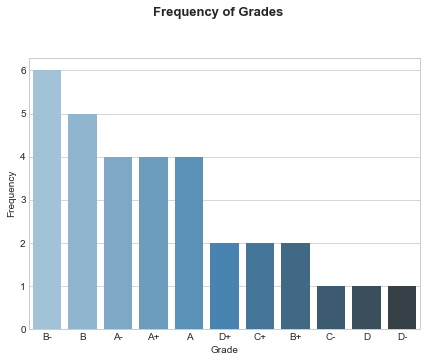

In [19]:
# frequency
fig, ax = plt.subplots()
fig.suptitle('Frequency of Grades', y=1.02, weight='bold', fontsize=13)
ax = sns.barplot(x=freq.index, y='Frequency', data=freq, palette="Blues_d")

# save the plot
plt.savefig('Data/frequency_of_grades.png', bbox_inches='tight');

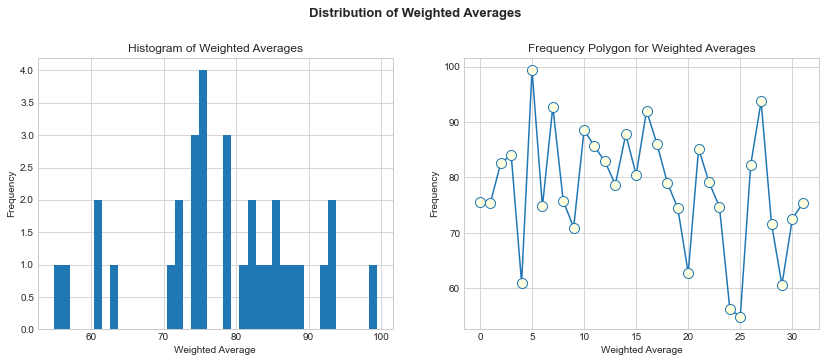

In [20]:
# histograms and frequency polygon
fig, [ax0, ax1] = plt.subplots(1,2, figsize=(14,5))
fig.suptitle('Distribution of Weighted Averages', y=1.02, weight='bold', fontsize=13)

# weighted scores hist
ax0.hist(test_res['Wtd. Avg'], bins=40)
ax0.set(title='Histogram of Weighted Averages',
      xlabel='Weighted Average',
      ylabel='Frequency')

# weighted scores freq polygon
ax1.plot(test_res['Wtd. Avg'],marker='.', linestyle='solid', markersize=20, markerfacecolor='lightyellow')
ax1.set(title='Frequency Polygon for Weighted Averages',
      xlabel='Weighted Average',
      ylabel='Frequency')

# save the plot
plt.savefig('Data/distribution_of_weighted_averages.png', bbox_inches='tight');

<br>

#### Saving results to Excel
___

In [21]:
# sort the table by weighted avg in descending order
sorted_scores = test_res.sort_values('Wtd. Avg', ascending=False, kind='stable')
sorted_scores.head()

,Name,Quiz #1,Quiz #2,Quiz #3,Midterm,Quiz #4,Quiz #5,Quiz #6,Quiz #7,Quiz #8,Project,Final,Quiz Avg,Wtd. Avg,Curved Avg,Rounded Avg,Grade
5,Student 6,97,96,99,100,100.0,100,100.0,100.0,100.0,99.0,100,99.00,99.40,106.37,106,A+
27,Student 28,94,92,88,90,36.0,100,96.0,100.0,96.0,98.0,100,87.75,93.72,100.69,101,A+
7,Student 8,100,100,85,85,60.0,92,100.0,100.0,82.0,96.0,100,89.88,92.76,99.73,100,A+
16,Student 17,88,88,95,94,40.0,100,100.0,100.0,64.0,93.0,100,84.38,92.01,98.98,99,A+
10,Student 11,100,92,99,80,48.0,100,100.0,100.0,75.0,90.0,94,89.25,88.58,95.55,96,A


In [22]:
# write and save 3 dataframes to the excel file 
writer = pd.ExcelWriter('Data/final_exam_analysis.xlsx', engine='xlsxwriter')
sorted_scores.to_excel(writer, index = False)
averages.to_excel(writer, startrow=len(test_res)+1, index=True, header=False)
freq.to_excel(writer, startcol=len(test_res.columns)+1, index=True)

# insert the image into the worksheet
workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.insert_image('A38', 'Data/distribution_of_weighted_averages.png')
worksheet.insert_image('V2', 'Data/frequency_of_grades.png')

# styling
column_settings = [{'header': column} for column in sorted_scores.columns]
(max_row, max_col) = sorted_scores.shape
worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})

writer.save()

<br>

___
#### End